In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [5]:
# Step 2: Load data
WSL2024_Player_stats = pd.read_excel("C:/Users/theod/Desktop/SPORTS ANALYTICS/WSL/WSL2024.xlsx")
WSL2024_Player_statsgoal = pd.read_excel("C:/Users/theod/Desktop/SPORTS ANALYTICS/WSL/Player_Stats_goalkeeping.xlsx")
WSL2024_Player_statsadvgoal = pd.read_excel("C:/Users/theod/Desktop/SPORTS ANALYTICS/WSL/Player_Stats_advgoalkeeping.xlsx")


In [6]:
# Step 3: Define common columns
common_columns = ['Rk', 'Nation', 'Pos', 'Age', 'Born', '90s']

In [7]:
# Step 4: Remove common columns from dataframes before merging
def remove_common_columns(df, common_columns):
    return df[[col for col in df.columns if col not in common_columns]]

In [8]:
# Step 5: Create new DataFrames without common columns
df_def = remove_common_columns(WSL2024_Player_stats, common_columns)
df_goalshootcre = remove_common_columns(WSL2024_Player_statsgoal, common_columns)
df_misc = remove_common_columns(WSL2024_Player_statsadvgoal, common_columns)

In [9]:
# Step 6: Merge DataFrames with common columns
merged_df = pd.merge(WSL2024_Player_stats[['Player', 'Squad'] + common_columns], df_def, on=['Player', 'Squad'], how='outer', suffixes=('', '_drop'))
merged_df = pd.merge(merged_df, df_goalshootcre, on=['Player', 'Squad'], how='outer', suffixes=('', '_drop'))
merged_df = pd.merge(merged_df, df_misc, on=['Player', 'Squad'], how='outer', suffixes=('', '_drop'))


In [10]:
# Step 7: Drop columns with '_drop' suffix
merged_df = merged_df[[col for col in merged_df.columns if not col.endswith('_drop')]]

In [11]:
# Step 8: Fill NaN cells with 0
merged_df_filled = merged_df.fillna(0)


In [12]:
# Step 9: Display first few rows of the DataFrame
merged_df_filled.head()

,Player,Squad,Rk,Nation,Pos,Age,Born,90s,Foot,Height,...,Crosses Faced,Crosses Stopped,Crosses Stopped %,Def. Actions Outside Pen. Area,Defensive actions outside of penalty area per 90 minutes,Avg. Distance of Def. Actions,Goals Against,Penalty Kicks Attempted,Penalty Kicks Allowed,Matches
0,Princess Ademiluyi,West Ham,1,eng ENG,"MF,FW",17,2006,1.0,right,1.75,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Michelle Agyemang,Arsenal,2,eng ENG,FW,17,2006,0.1,right,1.68,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
2,Alyssa Aherne,Everton,3,eng ENG,MF,19,2004,0.0,right,1.65,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
3,Olga Ahtinen,Tottenham,4,fi FIN,MF,26,1997,10.3,left,1.64,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
4,Asmita Ale,Leicester City,5,eng ENG,DF,21,2001,3.3,right,1.71,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
# Step 10: Assign merged DataFrame to a new variable
WSL2024a = merged_df_filled

In [14]:
# Step 11: Drop 'Matches' column if it exists
if 'Matches' in WSL2024a.columns:
    WSL2024a = WSL2024a.drop(columns=['Matches'])

In [15]:
# Step 12: Display descriptive statistics
WSL2024a.describe()

,Rk,Age,Born,90s,Height,Tackles,Tackles Won,Tackles (Def 3rd),Tackles (Mid 3rd),Tackles (Att 3rd),...,"Average length of goal kicks, in yards",Crosses Faced,Crosses Stopped,Crosses Stopped %,Def. Actions Outside Pen. Area,Defensive actions outside of penalty area per 90 minutes,Avg. Distance of Def. Actions,Goals Against,Penalty Kicks Attempted,Penalty Kicks Allowed
count,304.00000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,...,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.00000,304.000000,304.000000
mean,152.50000,24.940789,1997.720395,9.545066,1.691151,15.473684,10.319079,6.805921,6.263158,2.404605,...,2.915132,11.654605,0.661184,0.492434,0.648026,0.060625,1.169737,1.43750,0.075658,0.059211
std,87.90146,4.387551,4.451141,6.790683,0.057589,14.814785,9.996707,7.689852,6.642435,2.937879,...,9.290563,45.885376,2.803876,1.917363,2.901768,0.247826,3.899412,5.84362,0.369014,0.309019
min,1.00000,15.000000,1987.000000,0.000000,1.530000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,76.75000,22.000000,1994.000000,3.650000,1.650000,3.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,152.50000,25.000000,1998.000000,8.950000,1.700000,11.500000,8.000000,5.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,228.25000,28.000000,2001.000000,15.600000,1.730000,24.000000,16.000000,9.250000,9.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,304.00000,35.000000,2007.000000,22.000000,1.850000,72.000000,50.000000,42.000000,40.000000,18.000000,...,41.000000,330.000000,21.000000,12.600000,22.000000,2.000000,26.400000,43.00000,3.000000,3.000000


In [16]:
# Ensure all column names in the formula are valid Python identifiers
WSL2024a = WSL2024a.rename(columns={
    'Crosses into Penalty Area': 'Crosses_Into_Penalty_Area', 
    '% of Aerials Won': 'Aerials_Won_Percent'
})

In [17]:
# Confirm the columns are correctly renamed
print(WSL2024a.columns)

Index(['Player', 'Squad', 'Rk', 'Nation', 'Pos', 'Age', 'Born', '90s', 'Foot',
       'Height',
       ...
       'Average length of goal kicks, in yards', 'Crosses Faced',
       'Crosses Stopped', 'Crosses Stopped %',
       'Def. Actions Outside Pen. Area',
       'Defensive actions outside of penalty area per 90 minutes',
       'Avg. Distance of Def. Actions', 'Goals Against',
       'Penalty Kicks Attempted', 'Penalty Kicks Allowed'],
      dtype='object', length=176)


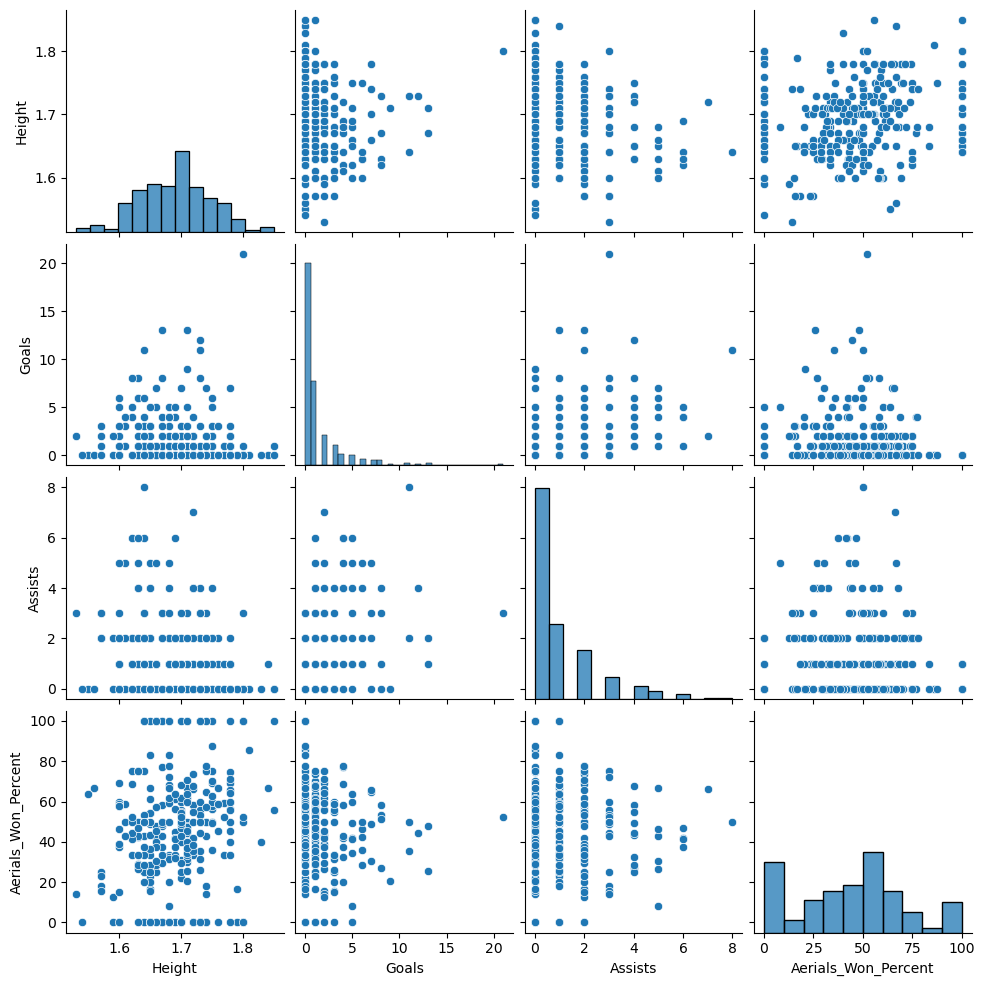

In [18]:
# Step 13: Pairplot for selected columns
relevant_columns = ['Height', 'Goals', 'Assists', 'Aerials_Won_Percent']
sns.pairplot(WSL2024a[relevant_columns])
plt.show()

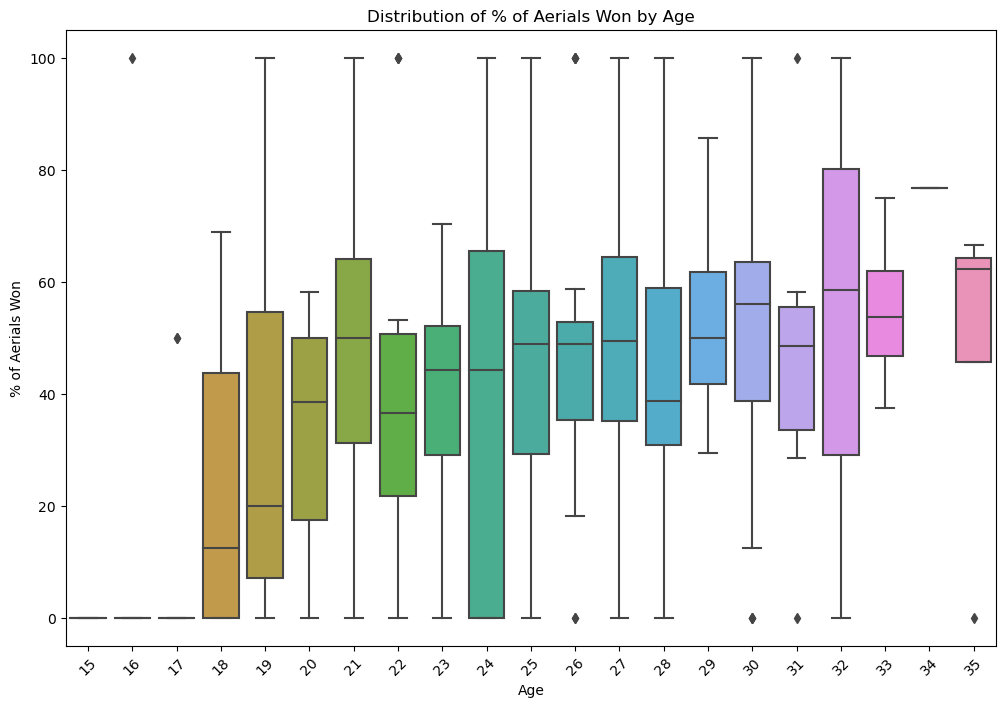

In [19]:
# Step 14: Boxplot for % of Aerials Won by Age
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age', y='Aerials_Won_Percent', data=WSL2024a)
plt.title('Distribution of % of Aerials Won by Age')
plt.xlabel('Age')
plt.ylabel('% of Aerials Won')
plt.xticks(rotation=45)
plt.show()

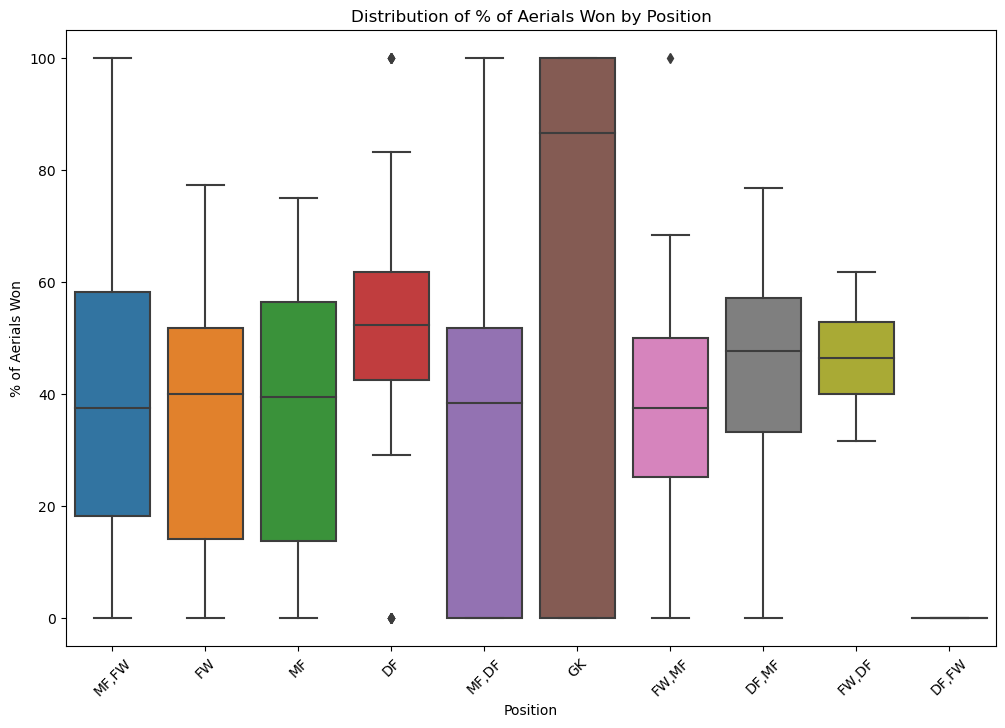

In [20]:
# Step 15: Boxplot for % of Aerials Won by Position
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pos', y='Aerials_Won_Percent', data=WSL2024a)
plt.title('Distribution of % of Aerials Won by Position')
plt.xlabel('Position')
plt.ylabel('% of Aerials Won')
plt.xticks(rotation=45)
plt.show()

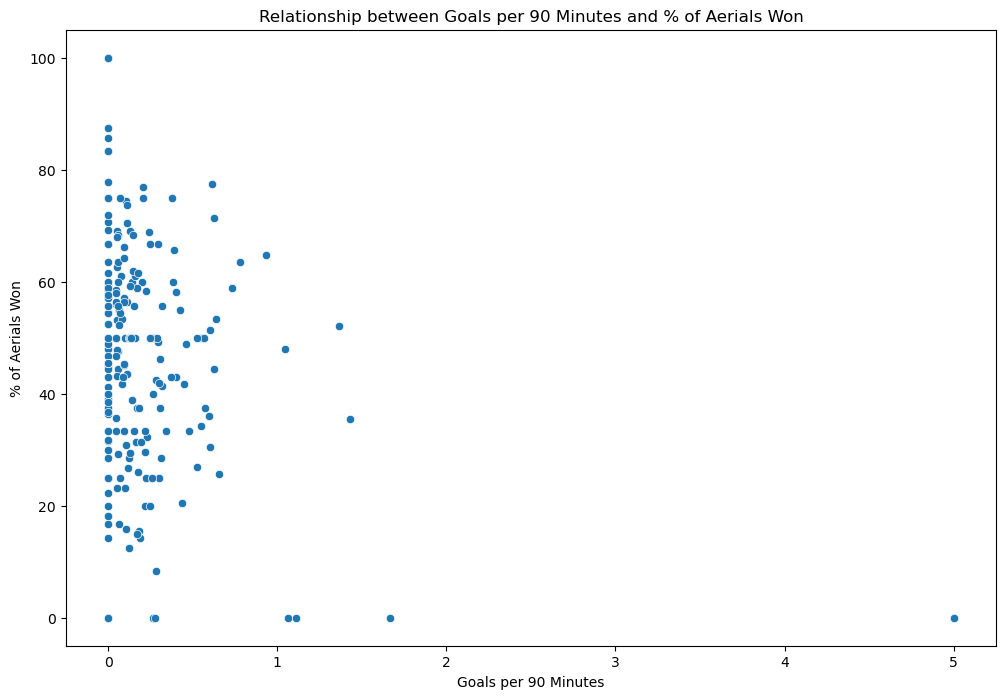

In [21]:

# Step 16: Scatter plot between Goals per 90 Minutes and % of Aerials Won
WSL2024a['Goals_per_90'] = WSL2024a['Goals'] / WSL2024a['90s']
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Goals_per_90', y='Aerials_Won_Percent', data=WSL2024a)
plt.title('Relationship between Goals per 90 Minutes and % of Aerials Won')
plt.xlabel('Goals per 90 Minutes')
plt.ylabel('% of Aerials Won')
plt.show()

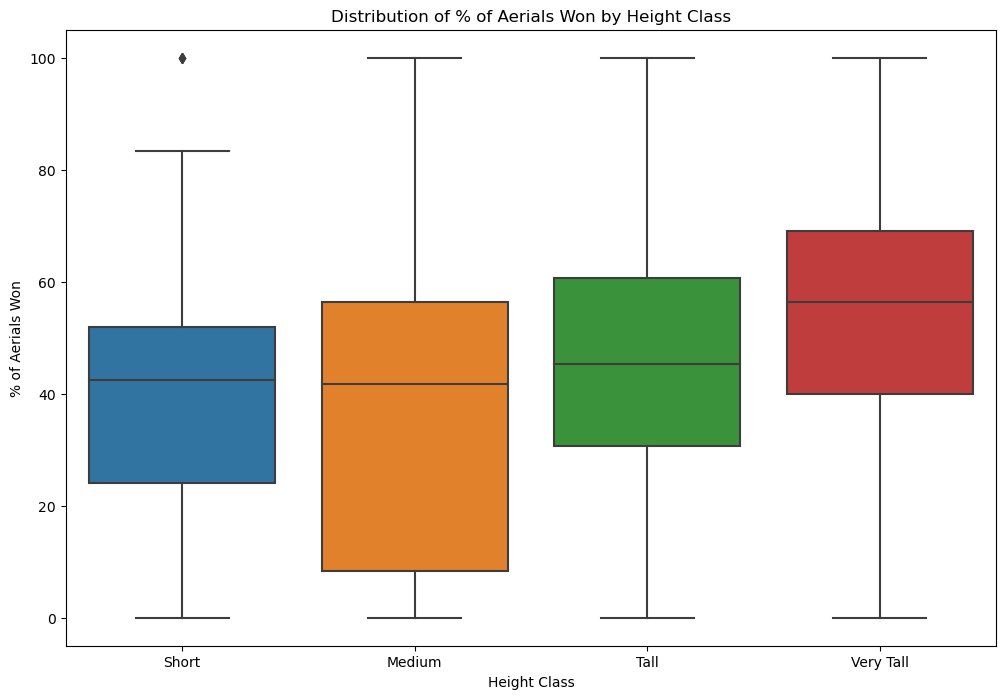

In [22]:
# Step 17: Boxplot for % of Aerials Won by Height Class
WSL2024a['Height_Class'] = pd.qcut(WSL2024a['Height'], q=4, labels=['Short', 'Medium', 'Tall', 'Very Tall'])
plt.figure(figsize=(12, 8))
sns.boxplot(x='Height_Class', y='Aerials_Won_Percent', data=WSL2024a)
plt.title('Distribution of % of Aerials Won by Height Class')
plt.xlabel('Height Class')
plt.ylabel('% of Aerials Won')
plt.show()

In [23]:
# Step 18: Groupby Squad for mean Height and % of Aerials Won
mean_stats = WSL2024a.groupby('Squad').agg({
    'Height': 'mean',
    'Aerials_Won_Percent': 'mean'
}).reset_index()

In [24]:
# Step 19: Sort and display mean_stats
mean_stats = mean_stats.sort_values(by='Aerials_Won_Percent', ascending=False)
mean_stats 

,Squad,Height,Aerials_Won_Percent
4,Chelsea,1.690000,51.332143
9,Manchester Utd,1.679000,51.235000
6,Leicester City,1.671667,50.725000
11,West Ham,1.690800,43.980000
10,Tottenham,1.677037,43.907407
3,Bristol City,1.693333,43.393333
2,Brighton,1.695833,43.316667
0,Arsenal,1.705556,40.977778
7,Liverpool,1.687600,40.128000
8,Manchester City,1.687727,38.018182


C:\Users\theod\AppData\Local\Temp\ipykernel_3660\3369496016.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(mean_stats['Squad'], rotation=45, ha='right')


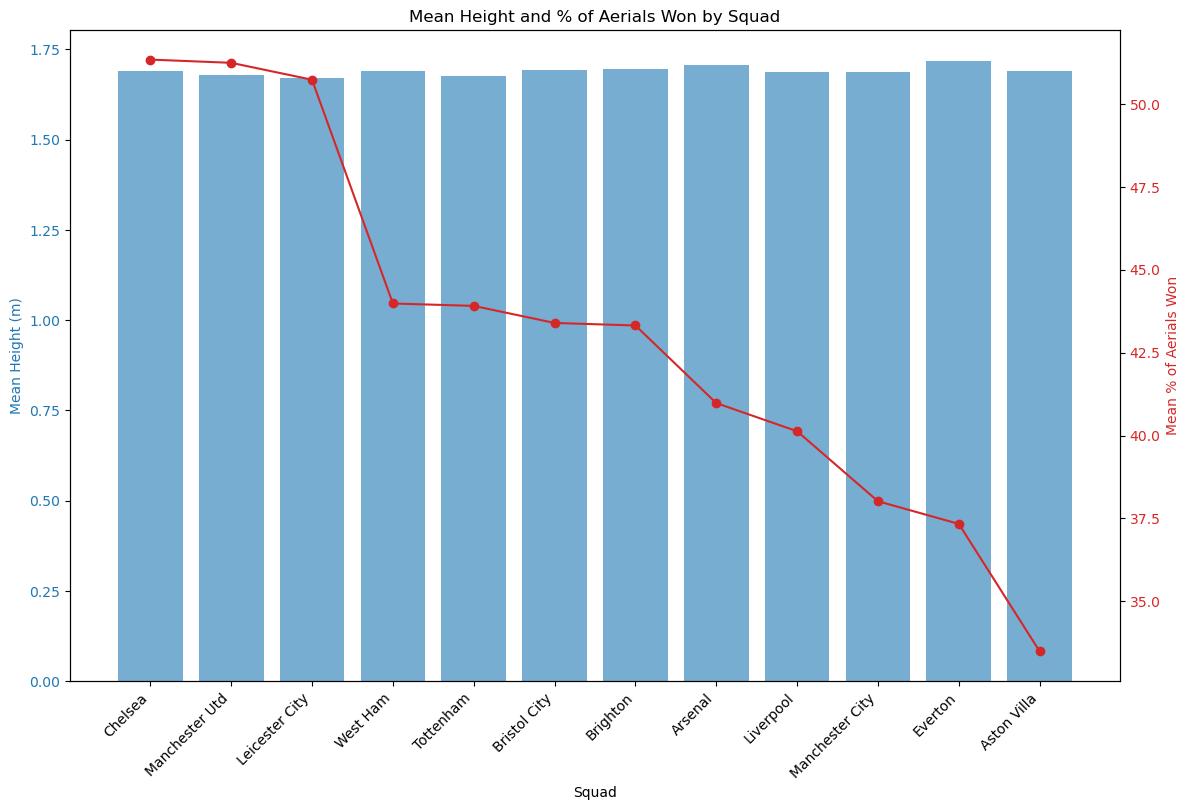

In [26]:
# Step 20: Plot mean Height and % of Aerials Won by Squad
fig, ax1 = plt.subplots(figsize=(12, 8))
color = 'tab:blue'
ax1.set_xlabel('Squad')
ax1.set_ylabel('Mean Height (m)', color=color)
ax1.bar(mean_stats['Squad'], mean_stats['Height'], color=color, alpha=0.6, label='Mean Height')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(mean_stats['Squad'], rotation=45, ha='right')


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mean % of Aerials Won', color=color)
ax2.plot(mean_stats['Squad'], mean_stats['Aerials_Won_Percent'], color=color, marker='o', label='Mean % of Aerials Won')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Mean Height and % of Aerials Won by Squad')
plt.show()


In [27]:
# Step 21: Calculate correlation between Height and % of Aerials Won
correlation = mean_stats['Height'].corr(mean_stats['Aerials_Won_Percent'])
print(f"Correlation between Height and % of Aerials Won: {correlation}")

Correlation between Height and % of Aerials Won: -0.5337056761453536


In [28]:
# Step 22: Groupby Position for mean % of Aerials Won
mean_pos_stats = WSL2024a.groupby('Pos').agg({
    'Aerials_Won_Percent': 'mean'
}).reset_index()

In [29]:
# Step 23: Sort and display mean_pos_stats
mean_pos_stats = mean_pos_stats.sort_values(by='Aerials_Won_Percent', ascending=False)
mean_pos_stats

,Pos,Aerials_Won_Percent
6,GK,58.864286
0,DF,51.156579
4,"FW,DF",46.600000
2,"DF,MF",44.390909
9,"MF,FW",40.800000
5,"FW,MF",38.018421
7,MF,36.191667
8,"MF,DF",35.114286
3,FW,34.822857
1,"DF,FW",0.000000


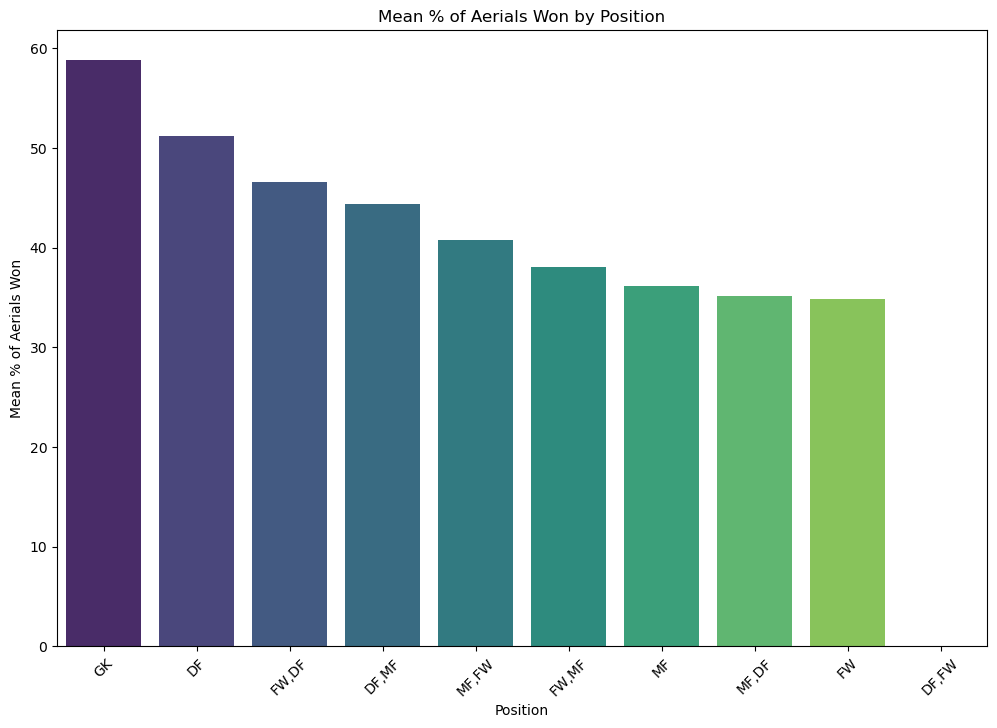

In [30]:
# Step 24: Bar plot for mean % of Aerials Won by Position
plt.figure(figsize=(12, 8))
sns.barplot(x='Pos', y='Aerials_Won_Percent', data=mean_pos_stats, palette='viridis')
plt.title('Mean % of Aerials Won by Position')
plt.xlabel('Position')
plt.ylabel('Mean % of Aerials Won')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Additional Analysis: Multivariate Linear Regression
# Multivariate linear regression
model = smf.ols(formula='Aerials_Won_Percent ~ Height + Age + Crosses_Into_Penalty_Area', data=WSL2024a).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Aerials_Won_Percent   R-squared:                       0.102
Model:                             OLS   Adj. R-squared:                  0.093
Method:                  Least Squares   F-statistic:                     11.31
Date:                 Fri, 26 Jul 2024   Prob (F-statistic):           4.77e-07
Time:                         13:25:04   Log-Likelihood:                -1432.6
No. Observations:                  304   AIC:                             2873.
Df Residuals:                      300   BIC:                             2888.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept   

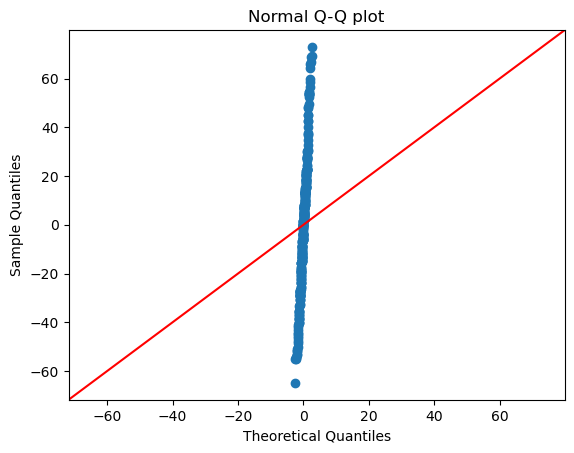

In [32]:
# Check for normality of residuals
residuals = model.resid
fig = sm.qqplot(residuals, line ='45')
plt.title("Normal Q-Q plot")
plt.show()

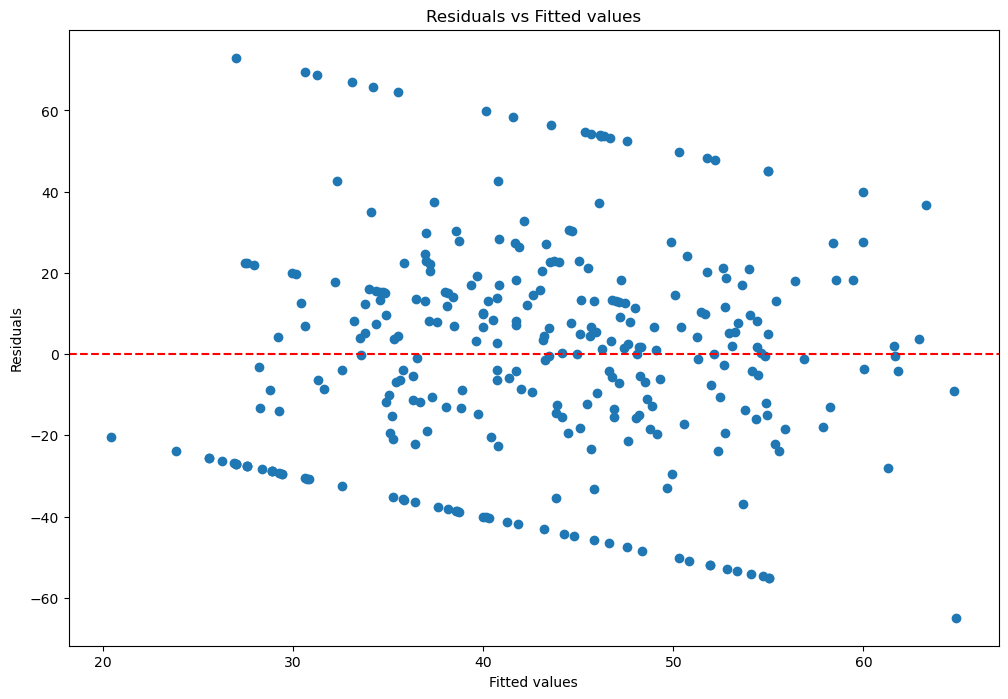

In [33]:
# Check for homoscedasticity
plt.figure(figsize=(12, 8))
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.axhline(0, color='red', linestyle='--')
plt.show()